<a href="https://colab.research.google.com/github/andrew-wairegi-school/core-week6-IP/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2021_11_Andrew_Wairegi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mchezopesa Ltd Win/Lose Analysis

By: Andrew Wairegi

**Definitions:**

Fifa ranking dataset:
*   Rank - Rank of the team
*   Country Abbreviation - Abbreviation of country
*   Total Points - points in that season
*   Previous Points - Points from previous season 
*   Rank Change - Change in rank from last season
*   Average Previous Years Points - Previous seasons points
*   Average Previous Years Points Weighted (50%) - Previous seasons points (Weighted)
*   Average 2 Years Ago Points - Seasons points (two years ago)
*   Average 2 Years Ago Points Weighted (30%) - Seasons points (two years ago, weighted)
*   Average 3 Years Ago Points - Seasons points (three years ago)
*   Average 3 Years Ago Points Weighted (20%) - Seasons points (three years ago, weighted)
*   Confederation - National confederation that it falls under

Results dataset:
*   Date - Date of the match
*   Home_team - Name of the hosting team
*   Away_team - Name of the visiting team
*   Home_score - full-time home-team score (including extra time, not including *   penalty-shootouts)
*   Away_score - full-time away-team score (including extra time, not including *   penalty-shootouts)
*   Tournament - Name of tournament
*   City - City/town/administrative unit where the match was played
*   Country - Country where match was played
*   Neutral - (TRUE/FALSE) column indicating whether the match was played at a fan neutral venue



## 1. Defining the Question

### a) Specifying the question

To predict a whether a home team will win / lose / draw. Based on the national football competitions. 

### b) Defining Metric for succcess

The accuracy rate of the model. This will determine whether the model can be used. As well as whether it gives us the correct predictors from the variables given to it.

### c) Understanding the context

Football matches take place every year between countries. Mchezopesa Ltd would like to find out which factors affect football matches. As well as whether they can predict whether a team will win based on these factors. Using a model.

### d) Experimental design

1. Reading the data
2. Previewing the data
3. Cleaning the data
4. Exploratory data analysis (EDA)
5. Implementing the solution
6. Challenging the solution
7. Conclusion
8. Recommendation
7. Follow up questions

### e) Data relevance

The data is relevant, because it was sourced from Fifa. This means that it is authentic. It also has a combination of countries from Home and Away. This means that it will have a fair analysis. As it has different kinds of countries competing against each other. As opposed to just one, which would make it biast.

## 2. Reading the data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data
# Dataset 1
df_games = pd.read_csv("https://drive.google.com/uc?id=1svJUGeeje2GE39P8MVMFmvqz8WVlTUVC")
df_games.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [3]:
# Dataset 2
df_rank = pd.read_csv("https://drive.google.com/uc?id=1FI9OyomQZVf7a7uK9XNxNHFlmbNXHK-D")
df_rank.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


## 3. Previewing the data

Previewing Dataset 1

In [4]:
# Number of records in dataset 1
df_games.shape

(40839, 9)

In [5]:
# Previewing the top of dataset 1
df_games.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
# Previewing the tail of dataset 1
df_games.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [7]:
# Checking if the datatypes are appropriate
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


Previewing Dataset 2

In [8]:
# Number of records in dataset 2
df_rank.shape

(57793, 16)

In [9]:
# Previewing the top of dataset 2
df_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [10]:
# Previewing the tail of dataset 2
df_rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [11]:
# Checking if the datatypes are appropriate
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

## 3. Cleaning Data

Feature engineering

In [12]:
# 1. Creating the rank column

In [13]:
# Converting the date columns to datetime
# df_games
df_games["date"] = pd.to_datetime(df_games["date"], yearfirst = True)

In [14]:
# df_rank
df_rank["rank_date"] = pd.to_datetime(df_rank["rank_date"], yearfirst = True)

In [15]:
# Function to get the rank from the rankings dataset
def home_team_rank(df):
  country_ranks = df_rank[(df_rank["country_full"] == df["country"]) & (df_rank["rank_date"].dt.year == df["date"].year)].sort_values("rank_date", ascending = False)
  if country_ranks.empty:
    country_ranks = df_rank[(df_rank["country_full"] == df["country"]) & (df_rank["rank_date"].dt.year < (df["date"].year) + 5) & (df_rank["rank_date"].dt.year > (df["date"].year) - 5)].sort_values("rank_date", ascending = False)
  # Next if statement
  if country_ranks.empty:
    return np.nan
  else:
    return country_ranks.iloc[0]["rank"]

In [16]:
# Feature engineering the rank column
df_games["home_rank"] = df_games.apply(home_team_rank, axis = 1)

In [17]:
# Checking for null values
df_games.isnull().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
city              0
country           0
neutral           0
home_rank     18109
dtype: int64

In [18]:
# Fill in missing data

# Randomize dataset
df_games = df_games.sample(frac = 1, random_state = 42)
# Forward fill to fill in the missing values
df_games["home_rank"] = df_games["home_rank"].ffill()
# Fill any remaining values backwards
df_games["home_rank"] = df_games["home_rank"].bfill()

In [19]:
df_games.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
home_rank     0
dtype: int64

In [20]:
# Return data to original order
df_games.sort_values("date", ascending = True, inplace = True)

In [21]:
df_games.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,159.0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,24.0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,2.0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,159.0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,162.0


In [22]:
# 2. Creating the win/loss/draw column

In [23]:
def home_win_draw_loss(df):
  if df["home_score"] > df["away_score"]:
    return 1;
  elif df["home_score"] == df["away_score"]:
    return 0;
  else:
    return -1;

In [24]:
df_games["win/draw/loss"] = df_games[["home_score", "away_score"]].apply(home_win_draw_loss, axis = 1)

In [25]:
df_games.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,win/draw/loss
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,159.0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,24.0,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,2.0,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,159.0,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,162.0,1


Data preparation

In [26]:
# 1. Converting columns to number types

# Tournament column
from sklearn.preprocessing import LabelEncoder
Labelencoder = LabelEncoder()

df_games["tournament"] = df_games["tournament"].str.strip()
df_games["tournament"] = Labelencoder.fit_transform(df_games["tournament"])
Labelencoder_mapping = dict(zip(Labelencoder.classes_, Labelencoder.transform(Labelencoder.classes_)))
print("Name mappings" + "\n" + str(Labelencoder_mapping))

Name mappings
{'ABCS Tournament': 0, 'AFC Asian Cup': 1, 'AFC Asian Cup qualification': 2, 'AFC Challenge Cup': 3, 'AFC Challenge Cup qualification': 4, 'AFF Championship': 5, 'AFF Championship qualification': 6, 'African Cup of Nations': 7, 'African Cup of Nations qualification': 8, 'African Nations Championship': 9, 'Amílcar Cabral Cup': 10, 'Atlantic Cup': 11, 'Atlantic Heritage Cup': 12, 'Balkan Cup': 13, 'Baltic Cup': 14, 'Brazil Independence Cup': 15, 'British Championship': 16, 'CCCF Championship': 17, 'CECAFA Cup': 18, 'CFU Caribbean Cup': 19, 'CFU Caribbean Cup qualification': 20, 'CONCACAF Championship': 21, 'CONCACAF Championship qualification': 22, 'CONIFA European Football Cup': 23, 'CONIFA World Football Cup': 24, 'COSAFA Cup': 25, 'Confederations Cup': 26, 'Copa América': 27, 'Copa América qualification': 28, 'Copa Artigas': 29, "Copa Bernardo O'Higgins": 30, 'Copa Carlos Dittborn': 31, 'Copa Chevallier Boutell': 32, 'Copa Félix Bogado': 33, 'Copa Juan Pinto Durán': 34, 

In [27]:
# Neutral column
df_games["neutral"].unique()

array([False,  True])

In [28]:
df_games["neutral"].replace({True: 1, False: 0}, inplace = True)

In [29]:
# 2. Renaming the games dataset
df = df_games

Cleaning

In [30]:
# 1. Checking for null values
df.isnull().sum()

date             0
home_team        0
away_team        0
home_score       0
away_score       0
tournament       0
city             0
country          0
neutral          0
home_rank        0
win/draw/loss    0
dtype: int64

In [31]:
# 2. Check for duplicates
df.duplicated().sum()

0

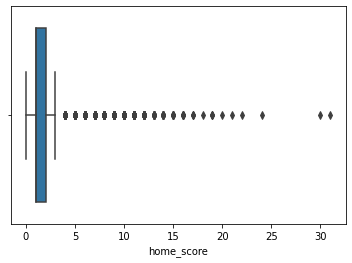

In [32]:
# 3. Check for outliers
sns.boxplot(data = df, x = "home_score")

In [33]:
df[df["home_score"] > 30]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,win/draw/loss
23781,2001-04-11,Australia,American Samoa,31,0,52,Coffs Harbour,Australia,0,48.0,1


In [34]:
# Not abnormal it's possible to get a home score of
# this much, with a bad team

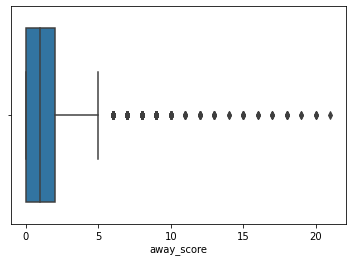

In [35]:
sns.boxplot(data = df, x = "away_score")

In [36]:
df[df["away_score"] > 18]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,win/draw/loss
12697,1983-08-22,Niue,Papua New Guinea,0,19,90,Apia,Western Samoa,1,19.0,-1
14705,1987-12-15,American Samoa,Papua New Guinea,0,20,90,Nouméa,New Caledonia,1,50.0,-1
25671,2003-06-30,Sark,Isle of Wight,0,20,63,St. Martin,Guernsey,1,46.0,-1
27350,2005-03-11,Guam,North Korea,0,21,49,Taipei,Chinese Taipei,1,156.0,-1
35998,2014-06-01,Darfur,Padania,0,20,24,Östersund,Sweden,1,44.0,-1
36003,2014-06-02,Darfur,South Ossetia,0,19,24,Östersund,Sweden,1,44.0,-1


In [37]:
# It's possible to get a away score of this much.
# If teamed up with a bad team.

In [38]:
# 4. Checking for anomalies
df["home_team"].value_counts()

Brazil                   563
Argentina                545
Mexico                   510
Germany                  501
England                  489
                        ... 
Crimea                     1
Sark                       1
Saint Helena               1
Central Spain              1
St. Pierre & Miquelon      1
Name: home_team, Length: 309, dtype: int64

In [39]:
# It makes sense that more popular teams, are appearing more.
# As they progress throughout the stages

In [40]:
df["away_team"].value_counts()

Uruguay               536
Sweden                527
England               505
Hungary               472
Paraguay              448
                     ... 
Andalusia               1
Central Spain           1
Barawa                  1
Parishes of Jersey      1
Corsica                 1
Name: away_team, Length: 306, dtype: int64

In [41]:
# It still makes sense that more popular teams are appearing.
# As they still may be playing more matches

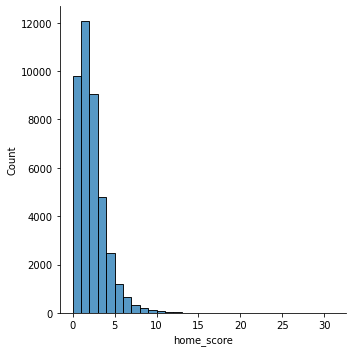

In [42]:
sns.displot(data = df, x = "home_score", bins = 31)

In [43]:
# Normally distributed.
# The goals should peak at around 3.
# This signifies a normal match.

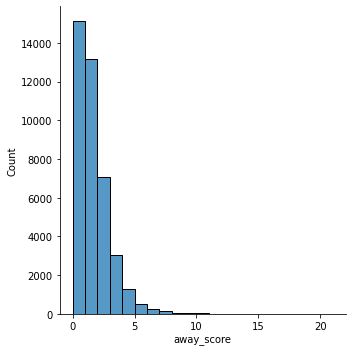

In [44]:
sns.displot(data = df, x = "away_score", bins = 21)

In [45]:
# This is also a normal set of matches.
# Most away teams, score few goals.

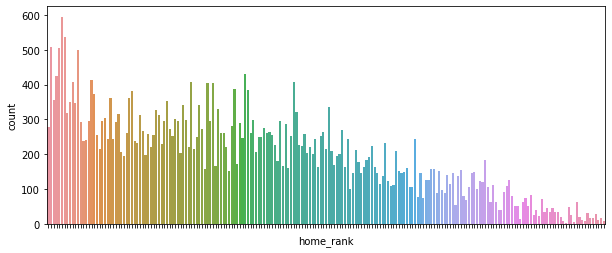

In [46]:
plt.figure(figsize = (10, 4))
countplot = sns.countplot(x = df["home_rank"].sort_values(ascending = False))
countplot.set(xticklabels = [])
plt.show()

In [47]:
df["home_rank"].mode

<bound method Series.mode of 0        159.0
1         24.0
2          2.0
3        159.0
4        162.0
         ...  
40833    197.0
40834    197.0
40836     45.0
40837     97.0
40838    197.0
Name: home_rank, Length: 40839, dtype: float64>

In [48]:
# Looks evenly distributed. Which is normal.
# However, it is leaning towards the higher ranks. Which makes sense,
# More teams will play worse than better teams. So they're should be 

In [49]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,win/draw/loss
0,1872-11-30,Scotland,England,0,0,54,Glasgow,Scotland,0,159.0,0
1,1873-03-08,England,Scotland,4,2,54,London,England,0,24.0,1
2,1874-03-07,Scotland,England,2,1,54,Glasgow,Scotland,0,2.0,1
3,1875-03-06,England,Scotland,2,2,54,London,England,0,159.0,0
4,1876-03-04,Scotland,England,3,0,54,Glasgow,Scotland,0,162.0,1


In [50]:
# 5. Trim strings of empty spaces

# Column names
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'home_rank',
       'win/draw/loss'],
      dtype='object')

In [51]:
# Column values
df["home_team"] = df["home_team"].str.strip()
df["away_team"] = df["away_team"].str.strip()
df["city"] = df["city"].str.strip()
df["country"] = df["country"].str.strip()

In [52]:
# 6. Change column names
df.rename(columns = {"tournament": "tournament type"}, inplace = True) # Tournament to tournament type
df.columns = df.columns.str.replace("_", " ") # Removing underscores from names
df.columns

Index(['date', 'home team', 'away team', 'home score', 'away score',
       'tournament type', 'city', 'country', 'neutral', 'home rank',
       'win/draw/loss'],
      dtype='object')

## 4. Exploratory Data analysis

In [53]:
groupby = (df[["tournament type", "win/draw/loss"]].groupby("tournament type")).count()
groupby.columns = ["Matches"]
groupby.sort_values("Matches", ascending = False).head(10)

,Matches
tournament type,
54,16911
52,7100
96,2432
8,1616
51,900
27,813
2,724
7,690
18,620


In [54]:
# The most recorded matches were: Friendlies, FIFA World Cup qualifications, UEFA Euro qualification, African Cup of Nations qualifications, 
# and ELF Cup matches

In [55]:
groupby.sort_values("Matches", ascending = False).tail(10)

,Matches
tournament type,
74,7
76,6
33,6
41,6
80,4
46,4
108,4
28,2
12,2


In [56]:
# The least recorded matches were: AFF Championship qualifications, Atlantic Heritage Cup matches, Copa América qualifications,
# World Unity Cup, Dragon Cup, OSN Cup

In [57]:
print("Name mappings" + "\n" + str(Labelencoder_mapping))

Name mappings
{'ABCS Tournament': 0, 'AFC Asian Cup': 1, 'AFC Asian Cup qualification': 2, 'AFC Challenge Cup': 3, 'AFC Challenge Cup qualification': 4, 'AFF Championship': 5, 'AFF Championship qualification': 6, 'African Cup of Nations': 7, 'African Cup of Nations qualification': 8, 'African Nations Championship': 9, 'Amílcar Cabral Cup': 10, 'Atlantic Cup': 11, 'Atlantic Heritage Cup': 12, 'Balkan Cup': 13, 'Baltic Cup': 14, 'Brazil Independence Cup': 15, 'British Championship': 16, 'CCCF Championship': 17, 'CECAFA Cup': 18, 'CFU Caribbean Cup': 19, 'CFU Caribbean Cup qualification': 20, 'CONCACAF Championship': 21, 'CONCACAF Championship qualification': 22, 'CONIFA European Football Cup': 23, 'CONIFA World Football Cup': 24, 'COSAFA Cup': 25, 'Confederations Cup': 26, 'Copa América': 27, 'Copa América qualification': 28, 'Copa Artigas': 29, "Copa Bernardo O'Higgins": 30, 'Copa Carlos Dittborn': 31, 'Copa Chevallier Boutell': 32, 'Copa Félix Bogado': 33, 'Copa Juan Pinto Durán': 34, 

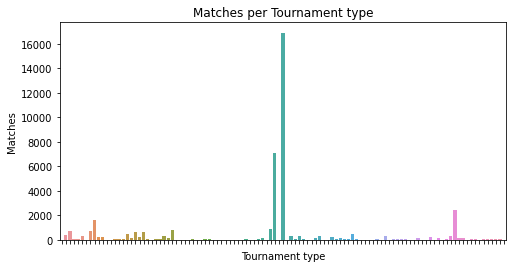

In [58]:
plt.figure(figsize = (8, 4))
barplot = sns.barplot(data = groupby, x = groupby.index, y = "Matches")
barplot.set(xticklabels = [])
plt.title("Matches per Tournament type")
plt.xlabel("Tournament type")
plt.show()

In [59]:
# The tournament types are distributed, and the biggest tournament type
# was friendlies followed by FIFA world cup qualifications. Which makes sense in this
# dataset. Since it was recorded by FIFA.

We need to convert the tournament type column to friendly or not. As we have proved that is the biggest type recorded in this dataset. By FIFA.

In [60]:
def friendly_converter(value):
  if value == 54:
    return 1;
  else:
    return 0;

In [61]:
df["friendly"] = df["tournament type"].map(friendly_converter)
df.drop("tournament type", axis = 1, inplace = True)

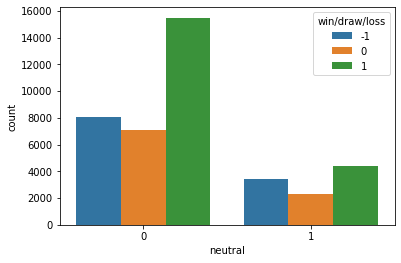

In [62]:
sns.countplot(data = df, x = "neutral", hue = "win/draw/loss")

In [63]:
# There were much more wins when the ground was not
# neutral. This meant that players, felt better. When they were
# playing on their own grounds

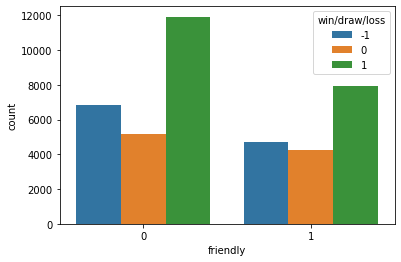

In [64]:
sns.countplot(data = df, x = "friendly", hue = "win/draw/loss")

In [65]:
# It looks like these values, are generally the same.
# Except that there were more unfriendly games than friendly.
# Which is expected in football.

<Figure size 576x288 with 0 Axes>

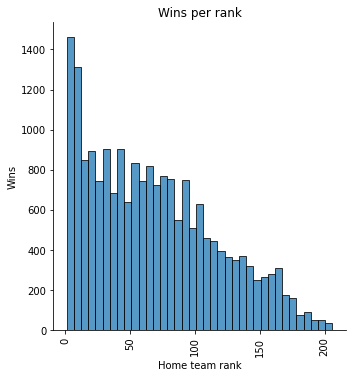

In [66]:
plt.figure(figsize = (8, 4))
sns.displot(x = df[(df["win/draw/loss"] == 1)]["home rank"])
plt.title("Wins per rank")
plt.xlabel("Home team rank")
plt.ylabel("Wins")
plt.xticks(rotation=90)
plt.show()

In [67]:
# The lower the rank, the less wins
# you have. This makes sense given that a higher
# rank, is meant to mean that you play better, and would
# have more wins.

In [68]:
df[["neutral", "home rank", "friendly", "win/draw/loss"]].corr()

,neutral,home rank,friendly,win/draw/loss
neutral,1.000000,-0.015942,-0.227087,-0.076013
home rank,-0.015942,1.000000,-0.040490,-0.098786
friendly,-0.227087,-0.040490,1.000000,-0.013068
win/draw/loss,-0.076013,-0.098786,-0.013068,1.000000


## 5. Implementing the solution

In [69]:
# Importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import scipy as sp

Preparation

Train test split

In [70]:
X = df[["neutral", "home rank", "friendly"]]
y = df["win/draw/loss"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

Modelling

In [72]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [73]:
predictions = LogReg.predict(X_test)

Evaluation

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
confusion_matrix(y_test, predictions)

array([[ 165,    0, 2726],
       [ 111,    0, 2225],
       [ 232,    0, 4751]])

In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.32      0.06      0.10      2891
           0       0.00      0.00      0.00      2336
           1       0.49      0.95      0.65      4983

    accuracy                           0.48     10210
   macro avg       0.27      0.34      0.25     10210
weighted avg       0.33      0.48      0.34     10210



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyperparameter tuning

In [77]:
# Model for tuning
ln_model = LogisticRegression(max_iter = 3000, solver='liblinear')

In [78]:
# Creating regularization space
penalty = ['l1', 'l2']
Coef = np.logspace(0, 5, 30)

# Creating the options
hyperparameters = dict(C=Coef, penalty=penalty)

In [79]:
# Grid search object
clf = GridSearchCV(ln_model, hyperparameters, cv=8, verbose=0)

In [80]:
# Fit, and get best model
best_model = clf.fit(X, y)

In [81]:
# Best params
print('Best Regularization:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Regularization: l1
Best C: 10.826367338740546


In [82]:
# Best score (Accuracy - weighted avg)
clf.best_score_

0.47971300763895497

This model with regularization performed better. So I believe the company can use this model. As the initial model, only had a macro precision score of 27%. As opposed to 48%. This means, that it must have performed much better. Especially in classifying wins or not. As it was already better in win classification before any regularization.

Model coefficients

In [83]:
X.columns

Index(['neutral', 'home rank', 'friendly'], dtype='object')

In [84]:
best_model.best_estimator_.coef_

array([[ 3.94336429e-01,  4.11693800e-03,  7.08113119e-02],
       [ 2.92986603e-02,  2.36458808e-04,  1.93241092e-01],
       [-3.55293093e-01, -3.64679909e-03, -1.99362050e-01]])

It seems that whether the game was friendly was the most important feature. Then rank was second. Then stadium neutrality was last, as the feature that determined the win, the most. We can also see this in the correlation matrix, in the exploratory analysis section.

## 6. Challenging the solution

In [86]:
# Is this the right model ?

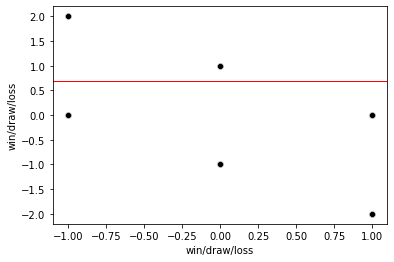

In [87]:
# Residual plot
residuals = np.subtract(predictions, y_test)
sns.scatterplot(x = y_test, y = residuals, color = "black")
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

According to these results. It means that while the model is correct. It seems that we are missing some data. That would determine whether a team, would win or not. However the model is sufficient, as we are not trying to predict on a continuous scale. But rather, a 3-point scale. Which means it is sufficient.

In [88]:
# Let's confirm this with Bartlett's test

In [89]:
# Bartletts test
test_result, p_value = sp.stats.bartlett(predictions, residuals) # Test result
degree_of_freedom = len(predictions)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom) # Critical value

print("test result: " + str(test_result) + ", critical value: " + str(critical_value))
if (test_result > critical_value):
  print('The variances are not homogeneous')
else:
  print('The variances are homogeneous!')

test result: 5531.338352011573, critical value: inf
The variances are homogeneous!


## 7. Conclusion

In conclusion we have found that the main variables that predict a win or not. Are Friendliness & home rank. However, friendliness makes a much higher prediction than home rank. Also Neutrality also had a high coefficeient. Together, they were able to predict 48% of wins & losses. The model did this by testing it on a set. That had both wins, losses, and draws. This means overall this model will be able to predict wins, losses, and draws.

The Mchezopesa Ltd company, can use this model to predict wins, with an accuracy of upto 48%. This will allow them to predict wins not only based on the environment, but also on the performance of the team. As the variables here, do not look at the quality of players. But rather rank looks at the potential of a team to score goals. Which overlooks the performance of the team in other sections. For example the defense, or midfield, or the individual players which have been swapped out for the older ones.

So overall Mchezopesa Ltd can use this model. To allow them to predict wins, but only looks at mainly environmental factors. As well as the performance of their attack in the team. However it does not look at the current attacking power of the team. Once they have changed over players.

Overall this will allow them to get a 48% accuracy. But by looking at team performance in different areas. They can predict a win with much more accuracy. So I suggest they do that.

## 8. Recommendation

My recommendation, is that the Mchezopesa ltd company. Looks for ways to find out the performance of teams. In their different sections. For example, midfield, defense, and attack. As this will allow them to predict team performance and wins much more effectively. It may also allow them to be able to predict the goals that each team score. Allowing them to predict outcomes much more accurately, as they desire. This is my recommendation to Mchezopesa ltd.

## 9. Follow up questions

### a). Did we have the right data?

Yes, but according to the residual plot. We are missing some data. Which could be performance metrics of some kind. However, the data as it is is sufficient to predict wins. As it reaches 50% accuracy, which is reasonable as this is a real-life dataset. Which does not include specific performance metrics.

### b). Do we need other data to answer our question?

Yes, we need data that has performance metrics on each of teams sections. This will allow us to predict wins more easily. This will also allow the model to be able to predict outcomes with more variables.

### c). Did we have the right question?

Yes, we had the right question. Predicting wins with this dataset is possible. Because it is easier to predict wins, than goals. This means that logisitic regression was the right choice. However, if we did want to predict goals. We would need more performance metrics. But they would have to be very specific. Meaning really close to how the team plays, in respect to the other teams in the league.